In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering

In [3]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [87]:
wine = pd.read_csv("wine.csv")

In [88]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [89]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [90]:
wine.drop(columns="Type",inplace=True)

In [91]:
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [92]:
wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [93]:
scaler = MinMaxScaler()

In [94]:
df = scaler.fit_transform(wine)

In [95]:
df = pd.DataFrame(df,columns=wine.columns)

In [96]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [140]:
pca = PCA(n_components = 3)

In [141]:
data = pca.fit_transform(df)

In [142]:
data

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01],
       [-8.21643663e-01, -5.80905512e-01,  8.11097172e-02],
       [-2.02546382e-01, -5.94665740e-02,  3.00239941e-01],
       [-6.08190152e-01, -4.87519191e-01, -7.54332321e-02],
       [-5.44047399e-01, -3.00196497e-01, -1.05074621e-01],
       [-4.74357495e-01, -2.98197021e-01, -2.82149308e-03],
       [-5.00432012e-01, -3.07602859e-01, -2.30493613e-01],
       [-6.27517969e-01, -2.06328233e-01, -1.14147932e-01],
       [-7.27467157e-01, -3.56512044e-01, -5.04199490e-02],
       [-3.74967744e-01, -2.25424535e-01, -2.86134083e-01],
       [-4.48188283e-01, -2.31938139e-01, -1.67908053e-01],
       [-6.26345329e-01, -3.55138677e-01, -8.58356579e-02],
       [-8.35717011e-01, -5.38047802e-01, -1.15202943e-01],
       [-4.71931568e-01, -3.37405385e-01, -7.27821607e-02],
       [-4.26990905e-01, -4.50842684e-01

In [143]:
np.round(pca.explained_variance_ratio_,2)

array([0.41, 0.19, 0.09])

In [144]:
x = data[:,:3]

In [145]:
x = pd.DataFrame(x,columns={"z1":[x[:,0]],"z2":[x[:,1]],"z3":[x[:,2]]})

In [146]:
x.head()

,z1,z2,z3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


Model

In [147]:
import warnings
warnings.filterwarnings("ignore")

In [148]:
from sklearn.metrics import silhouette_score

In [149]:
l=[]
m=[]
nc =range(2,13)
for i in nc:
  model = KMeans(n_clusters=i)
  cluster = model.fit_predict(x)
  l.append(model.inertia_)
  m.append(silhouette_score(x,cluster))


In [150]:
l

[34.294639587969556,
 18.938260830466426,
 15.682248589526566,
 13.625589743162834,
 11.6298966750483,
 10.339829214573268,
 9.512516305184997,
 8.843860721062594,
 8.090650456251002,
 7.5843083733694305,
 7.155866979945321]

In [151]:
m

[0.43235189362905235,
 0.47796626568347655,
 0.4260084778800526,
 0.38226942270172976,
 0.34855513929636994,
 0.30787419903803626,
 0.2921230031360101,
 0.3115009689975671,
 0.282108486145065,
 0.2639216792413,
 0.26564343738546786]

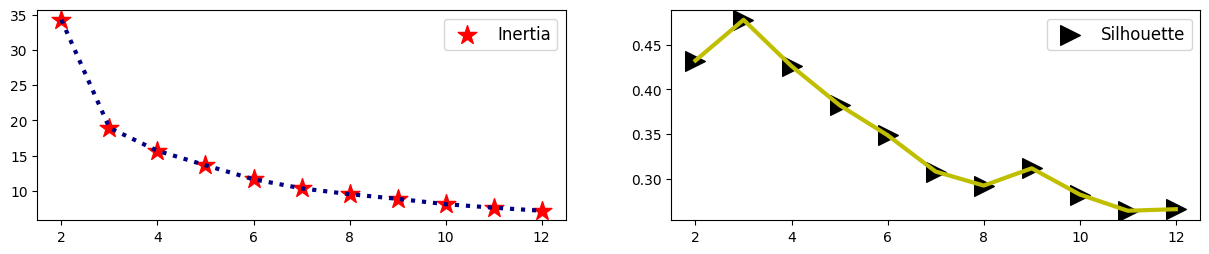

In [152]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.scatter(nc,l,s=200,marker="*",color="r")
plt.plot(nc,l,ls=":",lw=3,color="navy")
plt.legend(["Inertia"], loc="best", fontsize=12)

plt.subplot(2,2,2)
plt.scatter(nc,m,s=200,marker=">",color="black")
plt.plot(nc,m,ls="-",lw=3,color="y")
plt.legend(["Silhouette"], loc="best", fontsize=12)

In [153]:
model_k = KMeans(n_clusters=3)
model_k.fit(x)

KMeans(n_clusters=3)

In [154]:
cluster_tag = model_k.predict(x)
cluster_tag

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [155]:
x.sample()

,z1,z2,z3
160,0.675012,-0.143459,0.127051


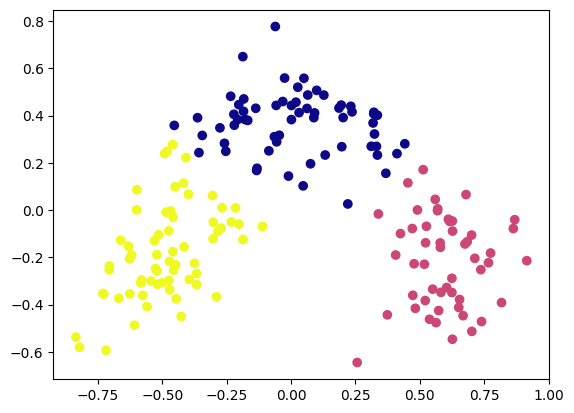

In [156]:
plt.scatter(x.z1,x.z2,c=cluster_tag,cmap="plasma")

In [157]:
sil_score = silhouette_score(x,cluster_tag)
sil_score

0.47796626568347655

In [158]:
wine_k =wine

In [159]:
wine_k["tag"] = cluster_tag

In [160]:
wine_k.sample()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Tag,tag
34,13.51,1.8,2.65,19.0,110,2.35,2.53,0.29,1.54,4.2,1.1,2.87,1095,1,2


In [161]:
wine_k.groupby(cluster_tag).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Tag,tag
0,12.202742,1.946774,2.249839,20.211290,93.451613,2.200806,2.038710,0.369032,1.607903,2.949355,1.056387,2.801129,502.709677,0.290323,0.0
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.000000,1.0
2,13.656923,1.946154,2.437692,17.441538,106.584615,2.864615,2.970000,0.284308,1.923846,5.361692,1.071385,3.148923,1080.107692,0.953846,2.0


Hierarchical cluster


In [162]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [163]:
x.head()

,z1,z2,z3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


In [164]:
link = linkage(x,method="ward",metric="euclidean")

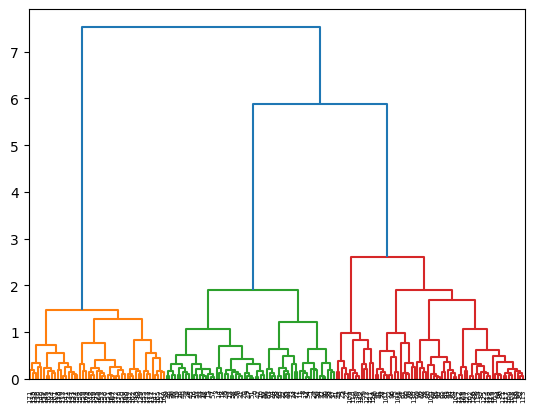

In [165]:
dendrogram(link)
plt.show()

In [166]:
model_h = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
model_h.fit(x)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [167]:
cn=model_h.fit_predict(x)

In [168]:
cn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

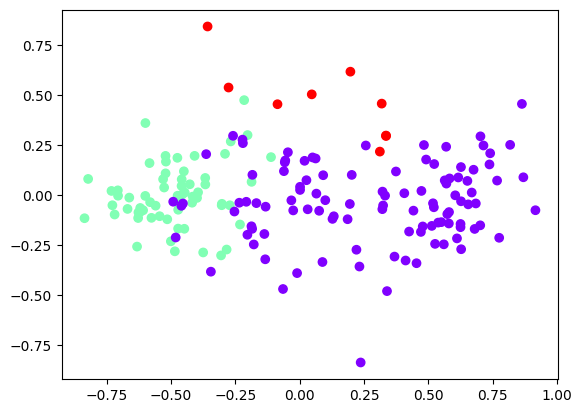

In [169]:
plt.scatter(x.z1,x.z3,c=cn,cmap=plt.cm.rainbow)

In [170]:
wine_h =wine

In [171]:
wine_h["Tag"] = cn

In [172]:
wine_h.drop(columns="tag",inplace=True)

In [173]:
wine_h.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Tag
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [174]:
wine_h.groupby(cn).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Tag
0,12.656449,2.433832,2.295888,20.354206,95.682243,1.970654,1.438598,0.396822,1.382991,5.015794,0.893140,2.259720,567.915888,0.0
1,13.713871,1.989194,2.457258,17.406452,107.435484,2.843871,2.967419,0.287903,1.922097,5.411290,1.072419,3.154839,1099.338710,1.0
2,12.178889,3.568889,2.581111,23.666667,95.000000,2.372222,2.588889,0.455556,1.781111,3.127778,0.930000,3.054444,446.777778,2.0


In [175]:
sil_h = silhouette_score(x,cn)
sil_h

0.2800601589658387

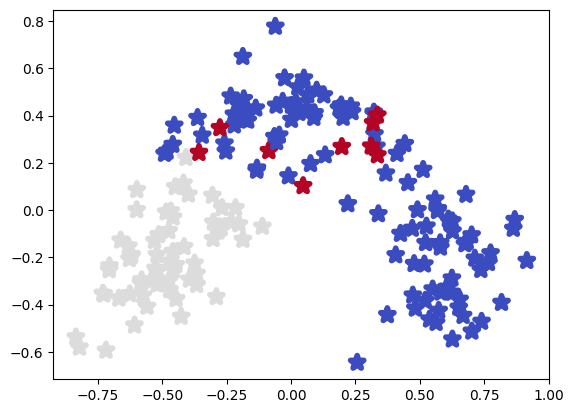

In [178]:
plt.scatter(x.z1, x.z2, marker='*', s=100, linewidths=4, c=cn, cmap=plt.cm.coolwarm)